/var/folders/9v/jcfdtcks4gqcxnckv1507c100000gn/T/ipykernel_4592/145522333.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(list(tickers.values()), period='30d', interval='1d')['Close']
[*********************100%***********************]  10 of 10 completed
/var/folders/9v/jcfdtcks4gqcxnckv1507c100000gn/T/ipykernel_4592/145522333.py:26: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = dados.pct_change().dropna() * 100


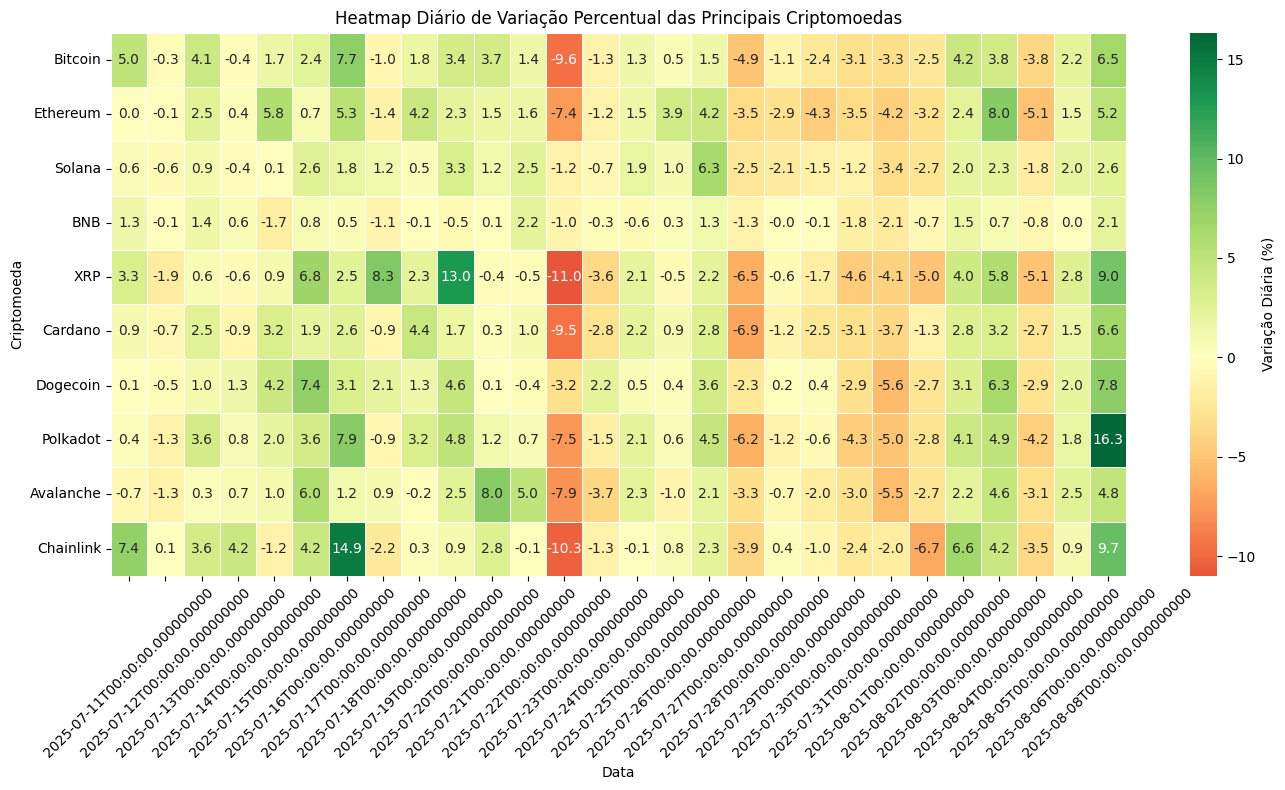

In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tickers = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Solana': 'SOL-USD',
    'BNB': 'BNB-USD',
    'XRP': 'XRP-USD',
    'Cardano': 'ADA-USD',
    'Dogecoin': 'DOGE-USD',
    'Polkadot': 'DOT-USD',
    'Avalanche': 'AVAX-USD',
    'Chainlink': 'LINK-USD'
}

dados = yf.download(list(tickers.values()), period='30d', interval='1d')['Close']
dados.columns = tickers.keys()
dados.dropna(axis=1, how='all', inplace=True)

if dados.empty or dados.shape[1] < 2:
    print("Erro: Nenhum dado válido foi carregado.")
else:
    retornos = dados.pct_change().dropna() * 100
    plt.figure(figsize=(14, 8))
    sns.heatmap(retornos.T, cmap="RdYlGn", center=0, annot=True, fmt=".1f", linewidths=0.5, cbar_kws={'label': 'Variação Diária (%)'})
    plt.title('Heatmap Diário de Variação Percentual das Principais Criptomoedas')
    plt.xlabel('Data')
    plt.ylabel('Criptomoeda')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
